In [30]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.visualization import plot_state_qsphere, plot_state_city, plot_bloch_multivector
from qiskit.visualization import array_to_latex

# numpy for linear algebra stuff
import numpy as np
import matplotlib.pyplot as plt

# To supress the deprecation warnings
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## Quantum circuit in arXiv:1912.06105
### The first two qubits are measured

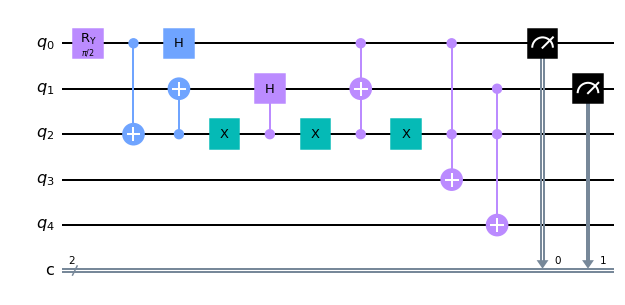

In [102]:
def circuit(theta=np.pi/2):
    
    qr = QuantumRegister(5,'q')
    cr = ClassicalRegister(2,'c')

    qc = QuantumCircuit(qr,cr)

    qc.ry(theta,qr[0])
    qc.cx(qr[0],qr[2])
    qc.h(qr[0])
    qc.cx(qr[2],qr[1])
    qc.x(qr[2])
    qc.ch(qr[2],qr[1])
    qc.x(qr[2])
    qc.ccx(qr[0],qr[2],qr[1])
    qc.x(qr[2])
    qc.ccx(qr[0],qr[2],qr[3])
    qc.ccx(qr[1],qr[2],qr[4])

    sim = Aer.get_backend('statevector_simulator')
    job = execute(qc, backend=sim)
    result = job.result()
    sv = result.get_statevector()
    
    qc.measure([0,1], [0,1])
    
    return qc,sv

qc,sv = circuit(np.pi/2)
qc.draw(output='mpl')

In [52]:
# plot_state_city(sv)

In [103]:
def displayresult(qc,sv):
    # define the backend
    backend= Aer.get_backend('qasm_simulator')
    # run the simulation
    job = execute(qc, backend=backend, shots = 2048)
    #get the result
    counts = job.result().get_counts()
    print ("Counts:",counts)

    # plot the histogram of the results
    display(plot_histogram(counts))
    display(plot_bloch_multivector(sv))
    display(array_to_latex(sv))

### $\theta$ = 0

Counts: {'10': 536, '00': 512, '11': 504, '01': 496}


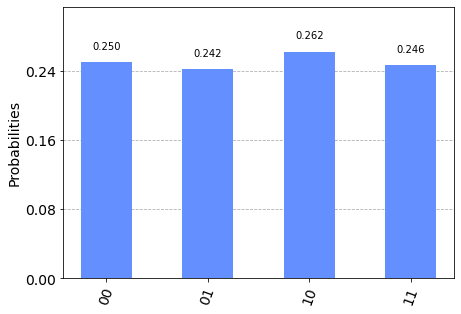

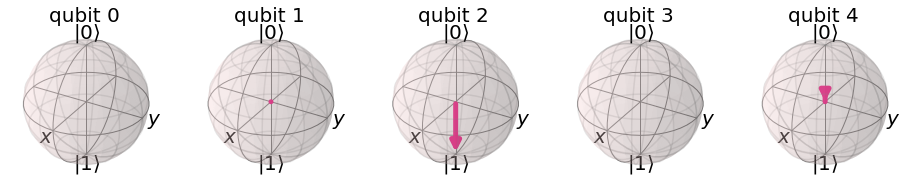

<IPython.core.display.Latex object>

In [105]:
qc,sv = circuit(0)
result(qc,sv)

### $\theta$ = $\pi$

Counts: {'10': 1024, '01': 1024}


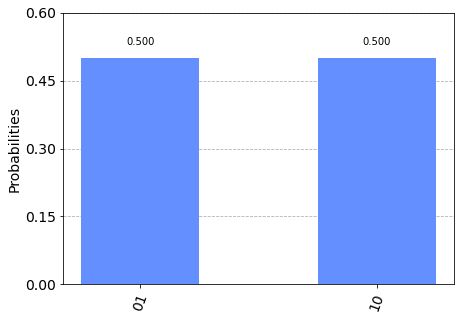

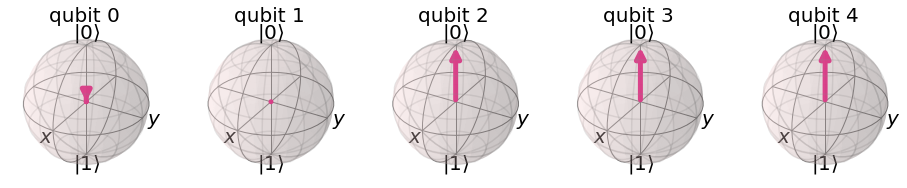

<IPython.core.display.Latex object>

In [106]:
qc,sv = circuit(np.pi)
result(qc,sv)

### $\theta$ = $\pi$/2

Counts: {'01': 779, '11': 228, '00': 264, '10': 777}


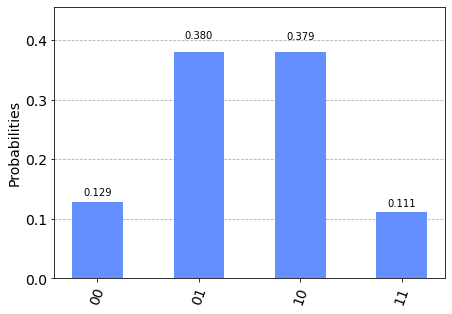

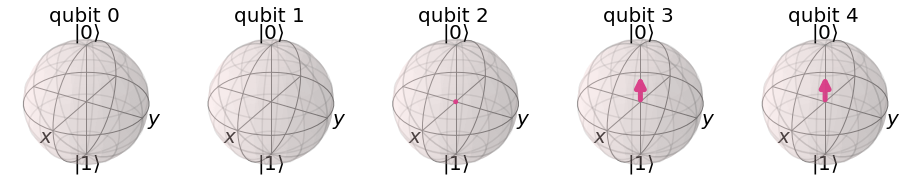

<IPython.core.display.Latex object>

In [107]:
qc,sv = circuit(np.pi/2)
result(qc,sv)

### $\theta$ = $\pi$/4

Counts: {'01': 571, '10': 589, '00': 460, '11': 428}


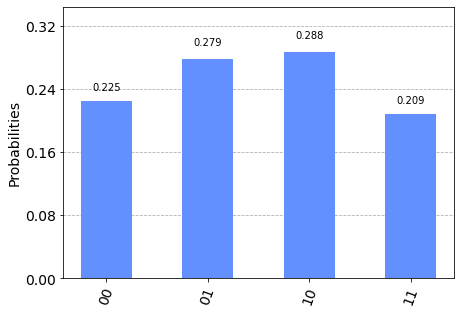

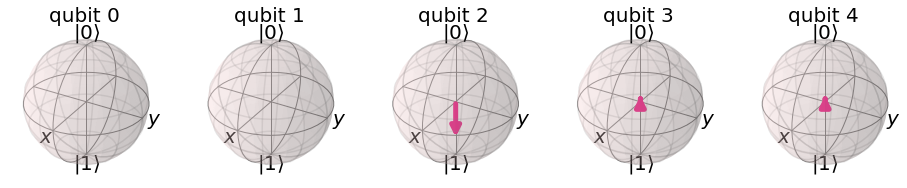

<IPython.core.display.Latex object>

In [111]:
qc,sv = circuit(np.pi/4)
result(qc,sv)